In [1]:
!pip install librosa

In [2]:
import librosa
from librosa import display

data, sampling_rate = librosa.load('ravdess/Actor_01/03-01-01-01-01-01-01.wav')

Populating the interactive namespace from numpy and matplotlib


C:\Users\Ria Jha\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['display']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


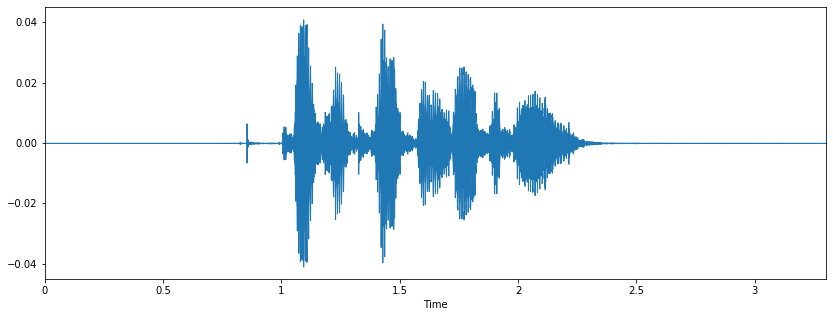

In [3]:
%pylab inline
import os
import pandas as pd
import glob

plt.figure(figsize=(14,5))
librosa.display.waveplot(data, sr = sampling_rate)

In [5]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier

In [4]:
path = 'ravdess'
lst = []

for subdir,dirs,files in os.walk(path):
    for file in files:
        try:
            X, sample_rate = librosa.load(os.path.join(subdir,file), res_type='kaiser_fast')
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
            file = int(file[7:8]) - 1
            arr = mfccs, file
            lst.append(arr)
        except ValueError:
            continue

In [6]:
print(lst)

[(array([-7.0722632e+02,  6.8469780e+01, -1.1611321e+01,  2.2716904e+01,
       -3.0307114e-01,  5.8222122e+00, -6.0815005e+00, -2.6553886e+00,
       -9.9603214e+00, -5.1031680e+00,  3.2924483e+00, -5.5770354e+00,
        3.8356307e+00, -5.1377640e+00,  9.9208570e-01,  8.2770622e-01,
       -4.7519999e+00, -1.2715769e+00, -2.2457409e+00, -4.8751026e-01,
       -6.2320042e+00, -8.3953929e-01, -1.7004611e+00, -5.6001277e+00,
       -3.6765704e-01, -2.3322442e+00, -3.2997949e+00, -1.3261485e+00,
       -8.5486418e-01, -9.8226887e-01, -1.1491295e+00, -2.7445965e+00,
       -2.2853038e+00, -2.1674156e+00, -2.9293275e+00, -1.7930071e+00,
       -7.5881582e-01, -2.1906621e+00, -2.9766684e+00, -2.0875320e+00],
      dtype=float32), 0), (array([-7.03383179e+02,  7.01977768e+01, -1.52132788e+01,  2.74126511e+01,
       -2.47905329e-01,  5.83749008e+00, -4.83120871e+00, -4.56903362e+00,
       -1.06079102e+01, -3.82000518e+00,  3.67736268e+00, -5.85584784e+00,
        3.49048638e+00, -5.37793827